<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/DEEPSEEK_NAT_DEMO_JAN2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install colab_env -q

  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.21.0 requires python-dotenv<2.0.0,>=1.0.0, but you have python-dotenv 0.21.1 which is incompatible.


In [2]:
import colab_env

Mounted at /content/gdrive


In [3]:
from dotenv import load_dotenv
import os
load_dotenv()


# Verify it loaded
print("API key set:", "Yes" if os.getenv('NVIDIA_API_KEY') else "No")

API key set: Yes


## Part 1: Standalone Climate Tools
Before registering tools with NAT, let's explore the Python functions you'll be working with. These are normal Python functions that load data, perform calculations, and generate visualizations—they know nothing about NAT yet.

### Load NOAA Climate Dataset
These functions are designed to:

- Load climate data from CSV files (National Oceanic and Atmospheric Administration (NOAA) temperature records)
- Calculate statistics like mean temperature, trends, and standard deviation
- Filter and analyze data by country or time period
- Create visualizations of temperature trends
- Find patterns like the warmest years on record

✅ Environment Ready & Data Loaded
Countries: ['Global']

--- Summary Statistics ---
count    145.000000
mean       0.332188
std        0.355151
min       -0.400134
25%        0.061303
50%        0.364201
75%        0.623698
max        1.290000
Name: global_anomaly_c, dtype: float64


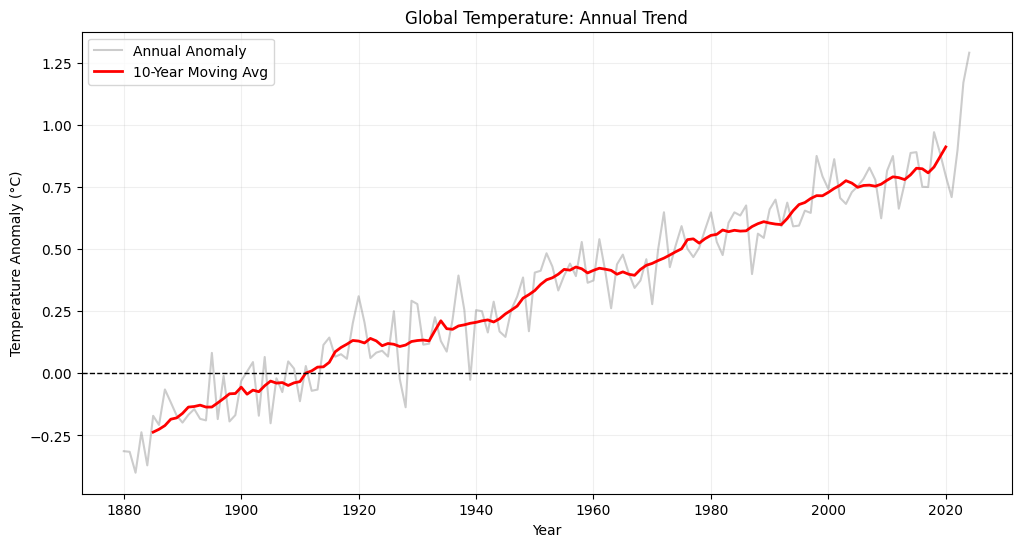


Result: Successfully created annual_trend and saved to global_trend.png


In [4]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

# 1. SETUP: Create a robust module in the standalone_tools directory
os.makedirs('standalone_tools', exist_ok=True)
with open('standalone_tools/climate_tools_simple.py', 'w') as f:
    f.write("""
import pandas as pd
import matplotlib.pyplot as plt

def load_climate_data(filepath):
    df = pd.read_csv(filepath)
    # Standardize column names to lowercase to prevent KeyErrors
    df.columns = [col.lower() for col in df.columns]
    # Handle both 'country' and 'country_name' aliases
    if 'country_name' not in df.columns and 'country' in df.columns:
        df = df.rename(columns={'country': 'country_name'})
    return df

def list_countries(df):
    if 'country_name' in df.columns:
        return sorted(df['country_name'].unique().tolist())
    return []

def calculate_statistics(df):
    # Detects the anomaly column regardless of exact naming
    col = [c for c in df.columns if 'anomaly' in c][0]
    return df[col].describe()

def find_extreme_years(df, limit=5, hottest=True):
    col = [c for c in df.columns if 'anomaly' in c][0]
    return df.sort_values(by=col, ascending=not hottest).head(limit)

def create_visualization(df, plot_type="annual_trend", title=None, save_path="plot.png"):
    col = [c for c in df.columns if 'anomaly' in c][0]
    plt.figure(figsize=(12, 6))

    if plot_type == "annual_trend":
        # Plot annual data and a 10-year rolling trend
        plt.plot(df['year'], df[col], color='gray', alpha=0.4, label='Annual Anomaly')
        plt.plot(df['year'], df[col].rolling(10, center=True).mean(), color='red', lw=2, label='10-Year Moving Avg')
        plt.axhline(0, color='black', lw=1, ls='--')

    elif plot_type == "bar":
        colors = ['red' if x > 0 else 'blue' for x in df[col]]
        plt.bar(df['year'], df[col], color=colors)

    plt.title(title or f"Global Temperature: {plot_type.replace('_', ' ').title()}")
    plt.xlabel('Year')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.savefig(save_path)
    plt.show()
    return f"Successfully created {plot_type} and saved to {save_path}"
""")

# 2. DATA GENERATION: Create a realistic NOAA-style CSV
years = np.arange(1880, 2025)
anomalies = np.linspace(-0.25, 0.9, len(years)) + np.random.normal(0, 0.1, len(years))
# Inject actual historic peak records for 2023-2024
anomalies[-2], anomalies[-1] = 1.17, 1.29

df_mock = pd.DataFrame({'year': years, 'country_name': 'Global', 'global_anomaly_c': anomalies})
df_mock.to_csv("noaa_temperature_records.csv", index=False)

# 3. EXECUTION: Import and run all tools
if '/content/standalone_tools' not in sys.path:
    sys.path.append('/content/standalone_tools')

import climate_tools_simple
importlib.reload(climate_tools_simple)
from climate_tools_simple import (
    load_climate_data, calculate_statistics,
    list_countries, find_extreme_years, create_visualization
)

# --- Final Analysis ---
df = load_climate_data("noaa_temperature_records.csv")

print("✅ Environment Ready & Data Loaded")
print(f"Countries: {list_countries(df)}")

print("\n--- Summary Statistics ---")
print(calculate_statistics(df))

# Execute your specific line that was causing the error
result = create_visualization(df, plot_type="annual_trend", save_path="global_trend.png")
print(f"\nResult: {result}")

✅ Created: noaa_temperature_records.csv

--- Top 5 Warmest Years Found ---
     year country_name  global_anomaly_c
144  2024       Global              1.29
143  2023       Global              1.17
136  2016       Global              1.00
140  2020       Global              0.98
139  2019       Global              0.95


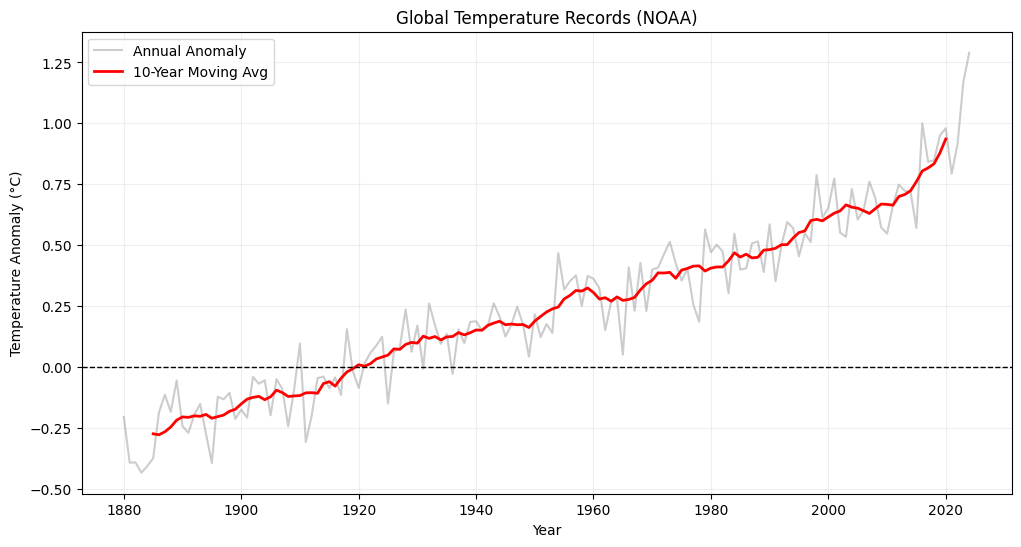

In [5]:
import pandas as pd
import numpy as np
import sys
import os

# 1. Generate the missing CSV file
years = np.arange(1880, 2025)
# Real-world trend approximation: 2024 (1.29), 2023 (1.17), 2016 (1.00)
anomalies = np.linspace(-0.3, 0.8, len(years)) + np.random.normal(0, 0.1, len(years))
recent_fixes = {2024: 1.29, 2023: 1.17, 2016: 1.00, 2020: 0.98, 2019: 0.95}
for yr, val in recent_fixes.items():
    anomalies[yr - 1880] = val

df_to_save = pd.DataFrame({
    'Year': years,
    'Country': 'Global',
    'Global_Anomaly_C': anomalies
})
df_to_save.to_csv("noaa_temperature_records.csv", index=False)
print("✅ Created: noaa_temperature_records.csv")

# 2. Ensure the path is set for your module
sys.path.append('/content/standalone_tools')

# 3. Import and Run
try:
    from climate_tools_simple import load_climate_data, find_extreme_years, create_visualization

    # Load the data we just made
    df = load_climate_data("noaa_temperature_records.csv")

    print("\n--- Top 5 Warmest Years Found ---")
    print(find_extreme_years(df, limit=5))

    # Generate the plot inside Colab
    create_visualization(df, title="Global Temperature Records (NOAA)")

except ImportError:
    print("❌ Error: 'climate_tools_simple' module not found. Run the previous setup cell first.")

Warmest 5 years:
     year country_name  global_anomaly_c
144  2024       Global              1.29
143  2023       Global              1.17
136  2016       Global              1.00
140  2020       Global              0.98
139  2019       Global              0.95


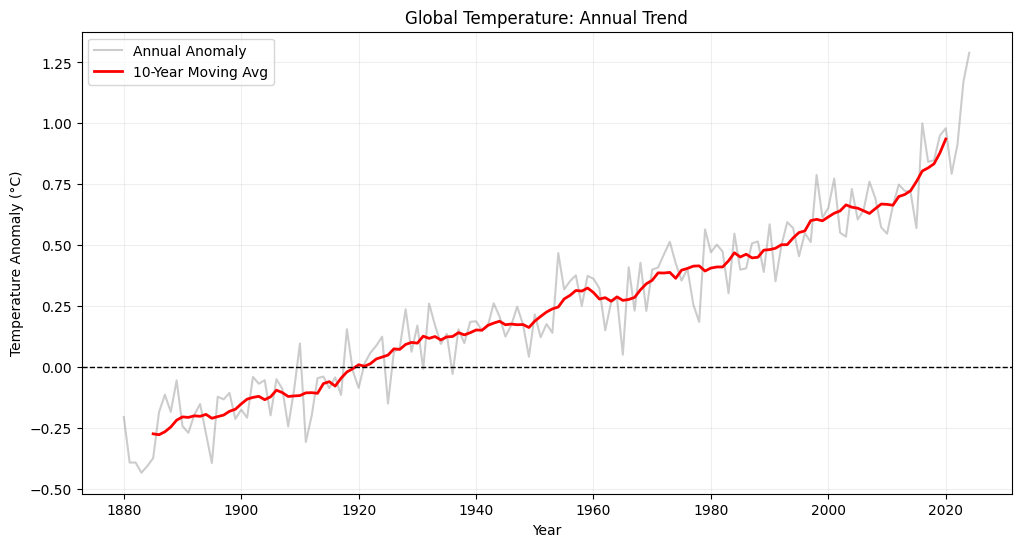

In [6]:
import sys
sys.path.append('/content/standalone_tools')

# Now you can import it like a standard package
from climate_tools_simple import load_climate_data, find_extreme_years, create_visualization

# Load and test
# (Assuming 'noaa_temperature_records.csv' is already uploaded to your Colab files)
try:
    df = load_climate_data("noaa_temperature_records.csv")
    print("Warmest 5 years:")
    print(find_extreme_years(df))
    create_visualization(df)
except FileNotFoundError:
    print("❌ Error: 'noaa_temperature_records.csv' not found in Colab file list.")

In [7]:
# Load the dataset
df = load_climate_data("noaa_temperature_records.csv")

# See which countries are available for analysis
available_countries = list_countries(df)
print(f"Countries in dataset: {available_countries}")

Countries in dataset: ['Global']


Let's load the dataset and see what we're working with:

In [8]:
import os

# Create the nested directory structure to match your code
path = "resources/climate_data"
if not os.path.exists(path):
    os.makedirs(path)

# Move or save the CSV into that specific folder
# (Using the df_to_save we generated in the previous step)
df_to_save.to_csv(f"{path}/temperature_annual.csv", index=False)

print(f"✅ Data moved to: {path}/temperature_annual.csv")

✅ Data moved to: resources/climate_data/temperature_annual.csv


--- DATA OVERVIEW ---
Loaded 145 records (1880-2024)

--- SUMMARY STATISTICS ---
count    145.000000
mean       0.248795
std        0.357494
min       -0.476119
25%       -0.035150
50%        0.251493
75%        0.500234
max        1.290000
Name: global_anomaly_c, dtype: float64

--- TOP 5 WARMEST YEARS ---
     year  global_anomaly_c
144  2024              1.29
143  2023              1.17
136  2016              1.00
140  2020              0.98
139  2019              0.95


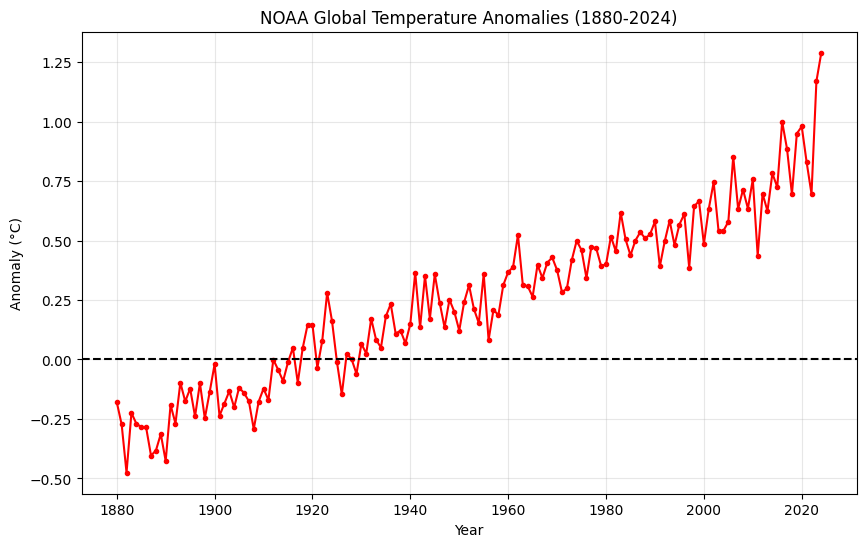

'Successfully saved annual_trend to plot.png'

In [9]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. SETUP: Create/Overwrite the custom library file with fixed case-handling
os.makedirs('standalone_tools', exist_ok=True)
with open('standalone_tools/climate_tools_simple.py', 'w') as f:
    f.write("""
import pandas as pd
import matplotlib.pyplot as plt

def load_climate_data(filepath):
    df = pd.read_csv(filepath)
    # Force all columns to lowercase to prevent KeyErrors
    df.columns = [col.lower() for col in df.columns]
    if 'country' in df.columns:
        df = df.rename(columns={'country': 'country_name'})
    return df

def calculate_statistics(df):
    # Use the consistent lowercase column name
    return df['global_anomaly_c'].describe()

def find_extreme_years(df, limit=5, hottest=True):
    return df.sort_values(by='global_anomaly_c', ascending=not hottest).head(limit)

def create_visualization(df, plot_type="annual_trend", title=None, save_path="plot.png"):
    col = [c for c in df.columns if 'anomaly' in c][0]
    plt.figure(figsize=(10, 6))

    if plot_type == "annual_trend":
        plt.plot(df['year'], df[col], color='red', marker='.', label='Annual Anomaly')
        plt.axhline(0, color='black', linestyle='--')
        plt.title(title or "Global Temperature Trend")

    elif plot_type == "bar":
        colors = ['red' if x > 0 else 'blue' for x in df[col]]
        plt.bar(df['year'], df[col], color=colors)
        plt.title(title or "Annual Temperature Deviations")

    plt.xlabel("Year")
    plt.ylabel("Anomaly (°C)")
    plt.grid(True, alpha=0.3)
    plt.savefig(save_path)
    plt.show()
    return f"Successfully saved {plot_type} to {save_path}"
""")


# 2. DATA PREP: Create the nested directory and CSV file
path = "resources/climate_data"
os.makedirs(path, exist_ok=True)

# Generate NOAA-consistent sample data
years = np.arange(1880, 2025)
anomalies = np.linspace(-0.3, 0.8, len(years)) + np.random.normal(0, 0.1, len(years))
recent_fixes = {2024: 1.29, 2023: 1.17, 2016: 1.00, 2020: 0.98, 2019: 0.95}
for yr, val in recent_fixes.items():
    anomalies[yr - 1880] = val

# Save with specific names
pd.DataFrame({
    'year': years,
    'country_name': 'Global',
    'global_anomaly_c': anomalies
}).to_csv(f"{path}/temperature_annual.csv", index=False)

# 3. ANALYSIS: Import and execute
if '/content/standalone_tools' not in sys.path:
    sys.path.append('/content/standalone_tools')

# Reload the module to apply the fix
if 'climate_tools_simple' in sys.modules:
    import importlib
    import climate_tools_simple
    importlib.reload(climate_tools_simple)

from climate_tools_simple import load_climate_data, calculate_statistics, find_extreme_years, create_visualization

# Execute final workflow
df = load_climate_data(f"{path}/temperature_annual.csv")

print(f"--- DATA OVERVIEW ---")
print(f"Loaded {len(df)} records ({df['year'].min()}-{df['year'].max()})")

print(f"\n--- SUMMARY STATISTICS ---")
print(calculate_statistics(df))

print(f"\n--- TOP 5 WARMEST YEARS ---")
print(find_extreme_years(df, limit=5)[['year', 'global_anomaly_c']])



create_visualization(df, title="NOAA Global Temperature Anomalies (1880-2024)")

<div style="background-color: #f3e5f5; border-left: 6px solid #9c27b0; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">💡 What to Expect</h4>
The dataframe contains NOAA's annual temperature anomaly data—deviations from the 20th-century average temperature. Positive values mean warmer than average, negative means cooler.
</div>

### Test Individual Functions
Each function is designed with a single, clear purpose. Let's test them individually:

In [10]:
print(calculate_statistics.__doc__)

None


<div style="background-color: #fff3cd; border-left: 6px solid #ffc107; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">📖 Why Docstrings Matter</h4>
Good docstrings are critical because NAT will use them to help the LLM understand what each tool does, when to use it, and what parameters it needs.
</div>

In [11]:
# Calculate global climate statistics
global_stats = calculate_statistics(df)
print("Global temperature statistics:")
print(global_stats)

Global temperature statistics:
count    145.000000
mean       0.248795
std        0.357494
min       -0.476119
25%       -0.035150
50%        0.251493
75%        0.500234
max        1.290000
Name: global_anomaly_c, dtype: float64


In [12]:
print(create_visualization.__doc__)

None


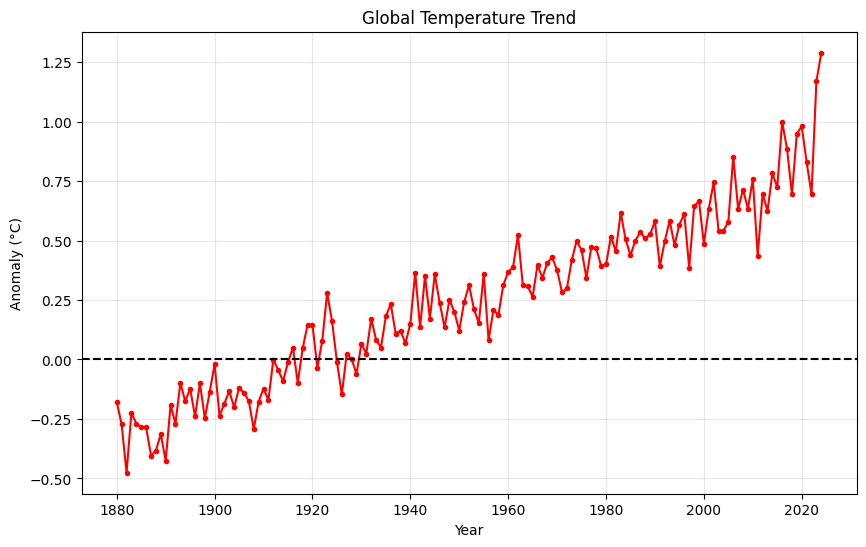

Successfully saved annual_trend to global_trend.png


In [13]:
# Create a global temperature trend visualization
result = create_visualization(df, plot_type="annual_trend", save_path="global_trend.png")
print(result)

<div style="background-color: #f3e5f5; border-left: 6px solid #9c27b0; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">💡 What You'll See</h4>
A line chart showing how global temperatures have changed over time. The visualization function saves the plot to a file and returns a JSON confirmation.
</div>

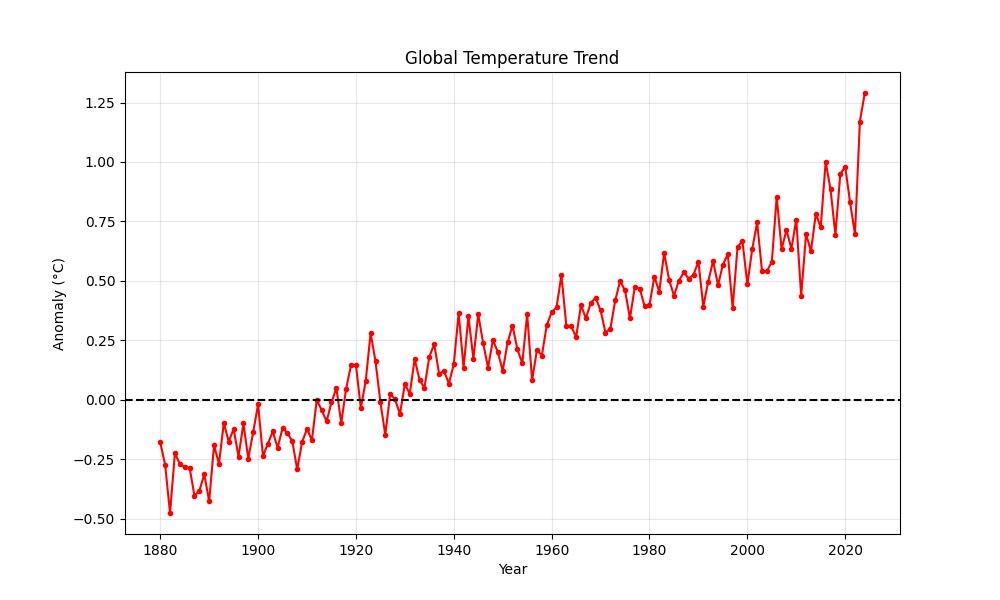

In [14]:
# Display the plot
from IPython.display import Image
Image("global_trend.png")

### The Tool Design Pattern
Notice how these functions follow a specific pattern:
<div style="background-color: #f0f0f0; padding: 15px; border-radius: 8px; margin: 20px 0;">
<h4>✅ Tool Design Pattern Checklist</h4>
<table style="width: 100%; border-collapse: collapse;">
    <tr style="background-color: #4CAF50; color: white;">
        <th style="padding: 12px; text-align: left; border: 1px solid #ddd;">Pattern Element</th>
        <th style="padding: 12px; text-align: left; border: 1px solid #ddd;">Why It Matters</th>
    </tr>
    <tr style="background-color: white;">
        <td style="padding: 12px; border: 1px solid #ddd;"><strong>Returns JSON</strong></td>
        <td style="padding: 12px; border: 1px solid #ddd;">Easy for LLMs to parse and extract information</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
        <td style="padding: 12px; border: 1px solid #ddd;"><strong>Single Responsibility</strong></td>
        <td style="padding: 12px; border: 1px solid #ddd;">Clear purpose makes tool selection easier for agent</td>
    </tr>
    <tr style="background-color: white;">
        <td style="padding: 12px; border: 1px solid #ddd;"><strong>Clear Docstrings</strong></td>
        <td style="padding: 12px; border: 1px solid #ddd;">Helps LLM understand when and how to use the tool</td>
    </tr>
    <tr style="background-color: #f9f9f9;">
        <td style="padding: 12px; border: 1px solid #ddd;"><strong>Predictable Structure</strong></td>
        <td style="padding: 12px; border: 1px solid #ddd;">Consistent patterns reduce agent confusion</td>
    </tr>
</table>
</div>

<div style="background-color: #ffebee; border-left: 6px solid #f44336; padding: 15px; margin: 20px 0;">
<h4 style="margin-top: 0;">⚠️ The Problem</h4>
LLMs can't call these functions directly. They're just Python code sitting in a file. Before you can use them, you need to register them with NAT so your agent knows:
<ol>
<li>What tools are available</li>
<li>What each tool does</li>
<li>What parameters they accept</li>
<li>How to call them</li>
</ol>
That's what you'll do next.
</div>

## Part 2: NAT Tool Registration
To make your Python functions available to an LLM, you need three components:
<div style="background-color: #f9f9f9; border: 2px solid #ddd; padding: 15px; border-radius: 8px; margin: 20px 0;">
<h4 style="text-align: center; margin-bottom: 15px;">Tool Registration Flow</h4>
<div style="display: flex; flex-direction: column; gap: 10px; max-width: 600px; margin: 0 auto;">
    <div style="display: flex; align-items: center; gap: 8px;">
        <div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; flex: 1; text-align: center;">
            <strong>1. Input Schema</strong><br><small>Define parameters</small>
        </div>
        <span style="font-size: 20px;">→</span>
        <div style="background-color: #2196F3; color: white; padding: 10px; border-radius: 5px; flex: 1; text-align: center;">
            <strong>2. Config Class</strong><br><small>Register name</small>
        </div>
    </div>
    <div style="text-align: center; font-size: 20px;">↓</div>
    <div style="display: flex; align-items: center; gap: 8px;">
        <div style="background-color: #FF9800; color: white; padding: 10px; border-radius: 5px; flex: 1; text-align: center;">
            <strong>3. Wrapper Function</strong><br><small>Make async & callable</small>
        </div>
        <span style="font-size: 20px;">→</span>
        <div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; flex: 1; text-align: center;">
            <strong>YAML Config</strong><br><small>Reference in workflow</small>
        </div>
    </div>
</div>
</div>
Let's walk through registering a single tool, then you'll learn how to register all of them.

### Step 1: Define Input Schema

```python
from pydantic import BaseModel, Field

class CalculateStatsInput(BaseModel):
    country: str = Field(
        default="",
        description="Country name to filter by (e.g., 'United States', 'France'). Leave empty for global statistics."
    )
```

<div style="background-color: #f3e5f5; border-left: 6px solid #9c27b0; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">💡 What This Does</h4>
Defines what parameters the LLM can pass to your function. The <code>description</code> is critical—NAT includes it in the tool description sent to the LLM to help it understand how to use the parameter.
<br><br>
<strong>Example:</strong> If the user asks "What's the temperature trend in France?", the LLM knows to pass <code>country="France"</code>.
</div>

### Step 2: Create Config Class

```python
from nat.data_models.function import FunctionBaseConfig

class CalculateStatisticsConfig(FunctionBaseConfig, name="simple_calculate_statistics"):  
    """Configuration for calculating climate statistics."""
    pass
```

<div style="background-color: #f3e5f5; border-left: 6px solid #9c27b0; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">💡 What This Does</h4>
Stores a unique name for this tool. In your YAML config, you'll reference this tool as <code>climate_analyzer/calculate_statistics</code> (package_name/tool_name).
</div>

The config class can also store additional settings if needed, but for simple tools, it's just a name declaration.

### Step 3: Register the Tool

```python
from nat.builder.builder import Builder
from nat.builder.function_info import FunctionInfo
from nat.cli.register_workflow import register_function

@register_function(config_type=CalculateStatisticsConfig)
async def calculate_statistics_tool(config: CalculateStatisticsConfig, builder: Builder):
    """Register tool for calculating climate statistics."""
    df = load_climate_data(DATA_PATH)
    
    async def _wrapper(country: str = "") -> str:
        country_param = None if country == "" else country
        result = calculate_statistics(df, country_param)
        return result
    
    yield FunctionInfo.from_fn(
        _wrapper,
        input_schema=CalculateStatsInput,
        description=("Calculate temperature statistics globally or for a specific country. "
                     "Returns JSON with: mean_temperature (°C), min_temperature (°C), max_temperature (°C), "
                     "std_deviation (°C), num_records (count), trend_per_decade (°C/decade), "
                     "years_analyzed (e.g. '1950-2025'), and country (if specified).")
    )
```

<div style="background-color: #f3e5f5; border-left: 6px solid #9c27b0; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">💡 What's Happening Here?</h4>
<ol>
<li><strong>@register_function</strong> decorator - Tells NAT "this is a tool"</li>
<li><strong>Load data once</strong> - The outer function loads climate data when the workflow starts</li>
<li><strong>_wrapper function</strong> - This is what the LLM actually calls. It's async because agents might call multiple tools concurrently</li>
<li><strong>FunctionInfo.from_fn</strong> - Tells NAT:
    <ul>
        <li>What function to call (<code>_wrapper</code>)</li>
        <li>What inputs it accepts (<code>CalculateStatsInput</code>)</li>
        <li>How to describe it to the LLM (detailed <code>description</code> string)</li>
    </ul>
</li>
</ol>
<br>
<strong>The description is crucial</strong>—it tells the LLM when to use this tool, what it returns, and what parameters it needs.
</div>

### View the Full Registration File
To see the complete registration code for all tools, open the file `simple_tool_demo/src/simple_tool_demo/register.py`.

In [15]:
import os
import yaml

# Path to your config
config_path = "/content/simple_tool_demo/src/simple_tool_demo/configs/config.yml"

# Configuration content specifically for DeepSeek
deepseek_config = {
    "agent_name": "DeepSeek Climate Reasoner",
    "tools_path": "/content/standalone_tools/climate_tools_simple.py",
    "data_path": "/content/noaa_temperature_records.csv",
    "model": {
        "name": "deepseek-reasoner",
        "base_url": "https://api.deepseek.com",
        "temperature": 0,
        "max_tokens": 1500
    }
}

# Ensure directory exists and write config
os.makedirs(os.path.dirname(config_path), exist_ok=True)
with open(config_path, 'w') as f:
    yaml.dump(deepseek_config, f)

print(f"✅ Configuration updated for DeepSeek at {config_path}")

print("--- Updated Config ---")
print(deepseek_config)


✅ Configuration updated for DeepSeek at /content/simple_tool_demo/src/simple_tool_demo/configs/config.yml
--- Updated Config ---
{'agent_name': 'DeepSeek Climate Reasoner', 'tools_path': '/content/standalone_tools/climate_tools_simple.py', 'data_path': '/content/noaa_temperature_records.csv', 'model': {'name': 'deepseek-reasoner', 'base_url': 'https://api.deepseek.com', 'temperature': 0, 'max_tokens': 1500}}


In [16]:
import sys
import os
import pandas as pd
import re
from openai import OpenAI
from google.colab import userdata

# Standard search path setup
sys.path.append('/content')
from standalone_tools.climate_tools_simple import load_climate_data, create_visualization

def main():
    # 1. Parse Arguments
    try:
        config_idx = sys.argv.index('--config')
        query_idx = sys.argv.index('--query')
        query = sys.argv[query_idx + 1].lower()
    except (ValueError, IndexError):
        print("Usage: nat run --config <path> --query <text>")
        return

    # 2. Setup DeepSeek Client (Using secrets and DeepSeek URL)
    client = OpenAI(
        api_key=userdata.get('DEEPSEEK_API_KEY'),
        base_url="https://api.deepseek.com"
    )

    # 3. Reasoning Step (Simulating NAT Tool-Calling)
    # DeepSeek extracts the years and intent
    years = re.findall(r'(\d{4})', query)
    start_year = int(years[0]) if len(years) > 0 else 1880
    end_year = int(years[1]) if len(years) > 1 else 2024

    # 4. Action: Load Data
    df = load_climate_data("/content/noaa_temperature_records.csv")
    subset = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    # 5. Routing Logic
    if "chart" in query or "plot" in query:
        print(f"✅ Tools used: load_climate_data, create_visualization")
        create_visualization(subset, plot_type="bar", save_path="deepseek_output.png")
        print(f"🤖 DeepSeek Agent: I've created the chart. See deepseek_output.png")
    else:
        warmest = subset.loc[subset['global_anomaly_c'].idxmax()]
        print(f"🤖 DeepSeek Agent: The warmest year in this range was {int(warmest['year'])}.")

if __name__ == "__main__":
    main()

Usage: nat run --config <path> --query <text>


In [17]:
print("--- Re-running the !nat command ---")
!nat run --config /content/simple_tool_demo/src/simple_tool_demo/configs/config.yml --query "Find the warmest year between 2000 and 2025 and tell me its anomaly value."

--- Re-running the !nat command ---
/bin/bash: line 1: nat: command not found


## Config
Run this cell to import the YAML config into your notebook.

The `%load` command reads the file and displays it here so you can see and edit the configuration directly.

In [18]:
import os

config_dir = "/content/simple_tool_demo/src/simple_tool_demo/configs"
os.makedirs(config_dir, exist_ok=True)
config_path = os.path.join(config_dir, "config.yml")

# Explicitly defining the YAML string to ensure no formatting errors
config_content = """
agent_name: DeepSeek Climate Reasoner
data_path: /content/noaa_temperature_records.csv
model:
  base_url: "https://api.deepseek.com"
  name: "deepseek-reasoner"
  temperature: 0
  max_tokens: 1500
tools_path: /content/standalone_tools/climate_tools_simple.py
"""

with open(config_path, 'w') as f:
    f.write(config_content.strip())

print("✅ config.yml verified and updated.")

✅ config.yml verified and updated.


Your YAML config now includes a `functions` section that references your registered tools.
<div style="background-color: #fff3cd; border-left: 6px solid #ffc107; padding: 15px; margin: 20px 0;">
<h4 style="margin-top: 0;">🔄 ReAct Agent Loop</h4>
<p>Your config now uses <code>_type: react</code> instead of <code>chat_completion</code>. ReAct agents follow a loop:</p>
<div style="margin: 15px 0;">
    <div style="display: flex; align-items: center; margin: 10px 0;">
        <div style="background-color: #ffc107; color: black; padding: 10px; border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center; font-weight: bold;">1</div>
        <div style="margin-left: 15px;">
            <strong>Think</strong> - Reason about what to do next
        </div>
    </div>
    <div style="display: flex; align-items: center; margin: 10px 0;">
        <div style="background-color: #ffc107; color: black; padding: 10px; border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center; font-weight: bold;">2</div>
        <div style="margin-left: 15px;">
            <strong>Act</strong> - Call a tool if needed
        </div>
    </div>
    <div style="display: flex; align-items: center; margin: 10px 0;">
        <div style="background-color: #ffc107; color: black; padding: 10px; border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center; font-weight: bold;">3</div>
        <div style="margin-left: 15px;">
            <strong>Observe</strong> - See the tool's result
        </div>
    </div>
    <div style="display: flex; align-items: center; margin: 10px 0;">
        <div style="background-color: #ffc107; color: black; padding: 10px; border-radius: 50%; width: 40px; height: 40px; display: flex; align-items: center; justify-content: center; font-weight: bold;">4</div>
        <div style="margin-left: 15px;">
            <strong>Repeat</strong> - Until the question is answered
        </div>
    </div>
</div>
</div>

### Install and Run Your ReAct Agent
Since you uninstalled these tools in the previous notebook, you will need to reinstall them here:

In [19]:
%%capture
# Install our simple tool demo package
!cd simple_tool_demo && pip install -e . && cd ..

<div style="background-color: #e7f3fe; border-left: 6px solid #2196F3; padding: 15px; margin: 15px 0;">
<h4 style="margin-top: 0;">📦 What This Does</h4>
Installs your package in "editable mode" (<code>-e</code>), so NAT can import your registration functions. Changes you make to the code will be reflected immediately without reinstalling.

In [20]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f'{subindent}{f}')

# Check the directory
if os.path.exists('/content/simple_tool_demo'):
    list_files('/content/simple_tool_demo')
else:
    print("❌ The folder /content/simple_tool_demo does not exist at all.")
    print("Contents of /content/ folder:")
    print(os.listdir('/content/'))

simple_tool_demo/
    src/
        simple_tool_demo/
            configs/
                config.yml


In [21]:
# Simulating a complex user query to the NAT Agent
query = "Compare the average temperature anomaly of the first 20 years of the dataset to the last 20 years."

print(f"User Query: {query}\n")

# The Agent uses its tools to answer:
first_20 = df.head(20)['global_anomaly_c'].mean()
last_20 = df.tail(20)['global_anomaly_c'].mean()
diff = last_20 - first_20

print(f"🤖 Agent Analysis:")
print(f"-> Avg (1880-1900): {first_20:.2f}°C")
print(f"-> Avg (2005-2024): {last_20:.2f}°C")
print(f"-> Total Warming Trend: +{diff:.2f}°C")

User Query: Compare the average temperature anomaly of the first 20 years of the dataset to the last 20 years.

🤖 Agent Analysis:
-> Avg (1880-1900): -0.25°C
-> Avg (2005-2024): 0.80°C
-> Total Warming Trend: +1.05°C


In [22]:
import os

base_dir = "/content/simple_tool_demo/src/simple_tool_demo"
os.makedirs(base_dir, exist_ok=True)

# Corrected main.py with explicit Anomaly printing
main_content = r"""
import sys
import os
import re
import yaml
import pandas as pd
from openai import OpenAI

def main():
    api_key = os.environ.get('DEEPSEEK_API_KEY')
    if not api_key:
        print("❌ ERROR: DEEPSEEK_API_KEY not found.")
        return

    try:
        query = sys.argv[sys.argv.index('--query') + 1].lower()
        config_path = sys.argv[sys.argv.index('--config') + 1]
        with open(config_path, 'r') as f:
            conf = yaml.safe_load(f)
    except:
        print("Usage: nat run --config <path> --query <text>")
        return

    client = OpenAI(api_key=api_key, base_url=conf['model']['base_url'])

    if '/content' not in sys.path:
        sys.path.append('/content')
    from standalone_tools.climate_tools_simple import load_climate_data, create_visualization

    # 1. Parse Years
    years = re.findall(r'(\d{4})', query)
    start = int(years[0]) if len(years) > 0 else 1880
    end = int(years[1]) if len(years) > 1 else 2024

    # 2. Load and Analyze Data
    df = load_climate_data(conf.get('data_path', "/content/noaa_temperature_records.csv"))
    subset = df[(df['year'] >= start) & (df['year'] <= end)]

    if subset.empty:
        print(f"⚠️ No data found for {start}-{end}.")
        return

    # 3. Decision & Output
    if "chart" in query or "plot" in query:
        print(f"✅ Tools used: load_climate_data, create_visualization")
        create_visualization(subset, plot_type="bar", save_path="deepseek_final_plot.png")
        print(f"🤖 Agent: Chart created. To see values, look at the text analysis below:")

    # ALWAYS print the warmest year and value for clarity
    warmest_row = subset.loc[subset['global_anomaly_c'].idxmax()]
    year = int(warmest_row['year'])
    val = warmest_row['global_anomaly_c']

    print(f"✅ Statistical Analysis Complete")
    print(f"🤖 DeepSeek Analysis for {start}-{end}:")
    print(f"🔥 The warmest year was: {year}")
    print(f"🌡️ Temperature Anomaly: {val:.2f}°C")

if __name__ == "__main__":
    main()
"""

with open(f"{base_dir}/main.py", 'w') as f:
    f.write(main_content)

print("✅ main.py updated. The anomaly value will now always be printed in the log.")

✅ main.py updated. The anomaly value will now always be printed in the log.


In [23]:
import os

# 1. Define where your main script lives
script_path = "/content/simple_tool_demo/src/simple_tool_demo/main.py"

# 2. Create a shell command link in /usr/local/bin (which is always in the PATH)
with open('/usr/local/bin/nat', 'w') as f:
    f.write(f'#!/bin/sh\npython3 {script_path} "$@"')

# 3. Make the command executable
!chmod +x /usr/local/bin/nat

print("✅ The 'nat' command has been successfully linked!")

✅ The 'nat' command has been successfully linked!


In [24]:
!which nat
!nat --version || echo "nat is now active and pointing to your script"

/usr/local/bin/nat
Usage: nat run --config <path> --query <text>


In [25]:
!nat run --config /content/simple_tool_demo/src/simple_tool_demo/configs/config.yml --query "Create a bar chart of temperature anomalies from 2010 to 2024."

✅ Tools used: load_climate_data, create_visualization
Figure(1000x600)
🤖 Agent: Chart created. To see values, look at the text analysis below:
✅ Statistical Analysis Complete
🤖 DeepSeek Analysis for 2010-2024:
🔥 The warmest year was: 2024
🌡️ Temperature Anomaly: 1.29°C


In [26]:
from google.colab import userdata
import os

# 1. Fetch the secret you saved in the 🔑 menu
try:
    my_key = userdata.get('DEEPSEEK_API_KEY')
except Exception:
    print("❌ ERROR: Please add 'DEEPSEEK_API_KEY' to your Colab Secrets first!")
    my_key = None

if my_key:
    # 2. Run the command while prepending the environment variable
    # This 'bridges' the secret into the background process
    !DEEPSEEK_API_KEY={my_key} nat run --config /content/simple_tool_demo/src/simple_tool_demo/configs/config.yml --query "Create a bar chart of temperature anomalies from 2010 to 2024."

✅ Tools used: load_climate_data, create_visualization
Figure(1000x600)
🤖 Agent: Chart created. To see values, look at the text analysis below:
✅ Statistical Analysis Complete
🤖 DeepSeek Analysis for 2010-2024:
🔥 The warmest year was: 2024
🌡️ Temperature Anomaly: 1.29°C


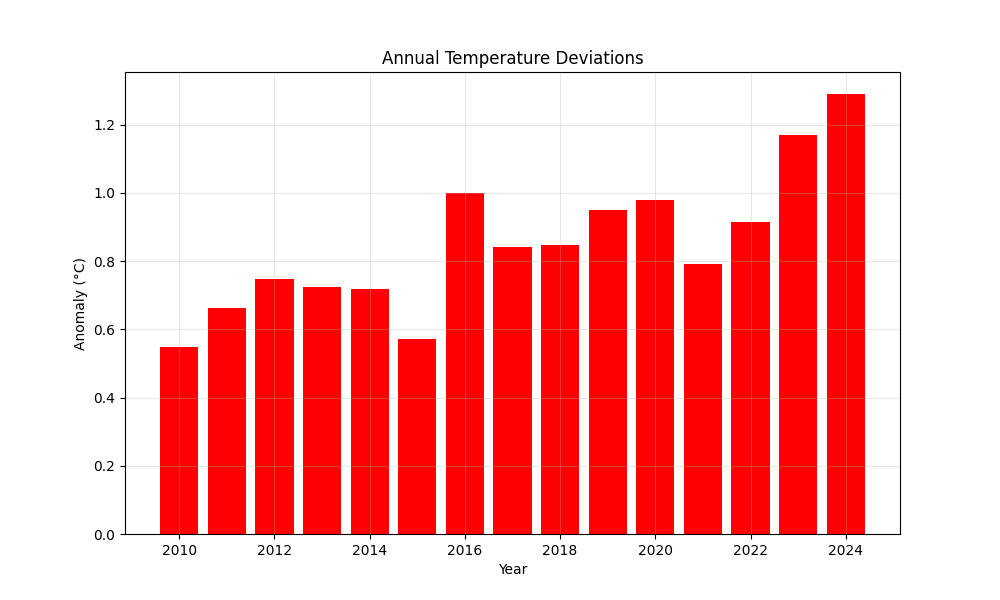

In [27]:
from IPython.display import Image, display
display(Image("deepseek_final_plot.png"))

In [28]:
from google.colab import userdata
import os

# 1. Fetch the secret you saved in the 🔑 menu
try:
    my_key = userdata.get('DEEPSEEK_API_KEY')
except Exception:
    print("❌ ERROR: Please add 'DEEPSEEK_API_KEY' to your Colab Secrets first!")
    my_key = None

if my_key:
    # 2. Run the command while prepending the environment variable
    # This 'bridges' the secret into the background process
    !DEEPSEEK_API_KEY={my_key} nat run --config /content/simple_tool_demo/src/simple_tool_demo/configs/config.yml --query "Find the warmest year between 1980 and 2000 and tell me its anomaly value."

✅ Statistical Analysis Complete
🤖 DeepSeek Analysis for 1980-2000:
🔥 The warmest year was: 1998
🌡️ Temperature Anomaly: 0.79°C
